# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [18]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [19]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [20]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [135,235,335]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6300,1289,2591,1170,199,326
1,1838,6380,2824,1218,1216,295
2,27082,6817,10790,1365,4111,2139


Column Percentile:


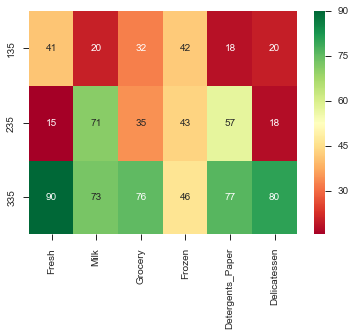

In [21]:
print "Column Percentile:"

import seaborn as sns

percent_value = (data.rank(pct=True)*100)
percent_value = percent_value.loc[indices]
ax = sns.heatmap(percent_value, vmin=percent_value.values.min(), vmax=percent_value.values.max(), annot=True, cmap="RdYlGn")


df = samples.sum(axis=1)
result = pd.concat([df, samples], axis=1)
result.rename(columns={0:'Total'}, inplace=True)

Row Percentage:


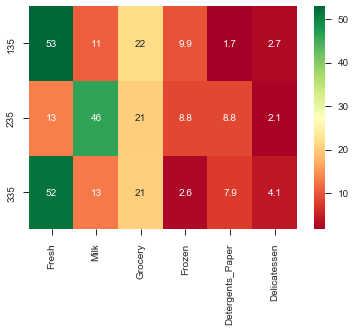

In [22]:
print "Row Percentage:"

df = samples.sum(axis=1)
result = pd.concat([df, samples], axis=1)
result.rename(columns={0:'Total'}, inplace=True)

result = result.div(result['Total'],axis=0)*100
result.drop("Total", axis=1, inplace=True)
ax = sns.heatmap(result, vmin=result.values.min(), vmax=result.values.max(),yticklabels=indices, annot=True, cmap="RdYlGn")

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
Assuming that we're the single supplier for our customers we can say that: 

*Number  135:*
This customer has low purchasing costs for most product categories. 53% of its spend goes to the Fresh category, followed by the Grocery category with 22%. Without domain knowledge we can't know for sure the business it's in. I assume it's a small restaurant or a salad bar.


*Number  235:*
The customer is in the 71 percentile for the Milk category. It could be a milkshake/juice or an ice-cream cafe. 


*Number  335:*
The last one is either medium or large enterprise, because it's in at least 70 percentile for 5 out of 6 categories. It's concentrated on the Fresh category which accounts for 52% of its overall spend. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


def predict_feature(feature_we_dont_like):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature_we_dont_like], axis=1)
    target_label = data[feature_we_dont_like]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_label, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    fit = regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = fit.score(X_test, y_test)

    print "The R^2 score without '{}' column is {:+.2f}".format(feature_we_dont_like, score)

print "Features in the dataset: ", data.columns.values
feature_we_dont_like = raw_input('Which feature you want to omit?: ')
predict_feature(feature_we_dont_like)

Features in the dataset:  ['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
Which feature you want to omit?: Milk
The R^2 score without 'Milk' column is +0.16


In [25]:
features = data.columns.values
for feature in features:
    predict_feature(feature)

The R^2 score without 'Fresh' column is -0.39
The R^2 score without 'Milk' column is +0.16
The R^2 score without 'Grocery' column is +0.68
The R^2 score without 'Frozen' column is -0.21
The R^2 score without 'Detergents_Paper' column is +0.27
The R^2 score without 'Delicatessen' column is -2.25


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

We assume that the DecisionTreeRegressor is quite good for training a model in the given scenario. 

The higher score means that we can easily drop the feature and still be able to predict it with other features on hands. The feature named "Grocery" has the highes R^2 of 0.68. In my view the R^2 score for "Grocery" is not that high, although it's the highest in the dataset, so this feature could be easier to predict. Hence, if I was asked to predict a feature I would do it for the "Grocery" column.  That basically means it's not that valuable for identifying customers' spending habits.

The scores for other features are very low and some of them are negative. For example, "Fresh" and "Delicatessen" with the negative scores of -0.39 and -2.25 respectively fail to fit the data. But it's a good thing actually. This shows us that the data they contain is unique and could be useful for clastering. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

Illustration 1: features distribution


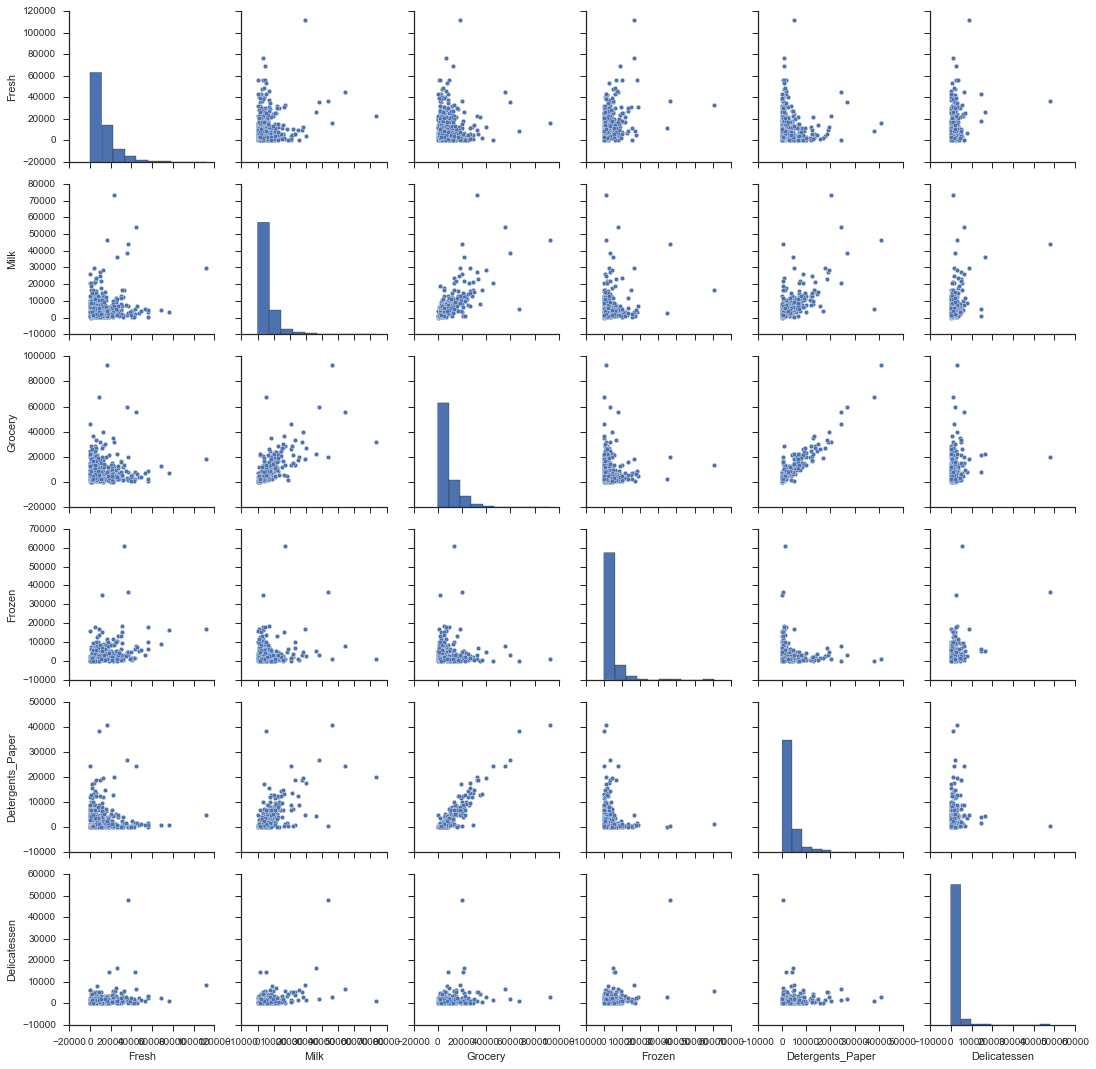

In [26]:
# Produce a scatter matrix for each pair of features in the data
sns.set(style="ticks", color_codes=True)
print("Illustration 1: features distribution")
g1 = sns.pairplot(data)

Illustration 2: correlation table


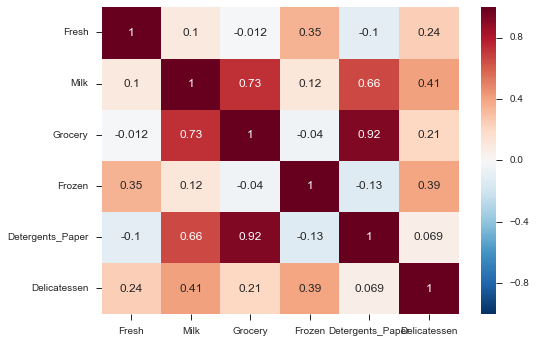

In [27]:
#correlation table plotting
print("Illustration 2: correlation table")
q2 = sns.heatmap(data.corr(), annot=True)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
It looks like the Detergents/Paper and Grocery categories show some degree of correlation as seen on the illustration 1. There is a 45 degree line on which we'll be able to project the data without losing too much information. We know from the previous execrise these two features also happen to be the most predictable given all other features. So, that's confirm our hypothesis that one of these features could be dropped (preferably Grocery).

Moreover if we take a look at the Illustration 2 we'll see the highest correlation for Grocery and Detergents_Paper. 
 
Other figures with some degree of correlation are "Milk" and "Detergents_Paper" and "Grocery" and "Milk". At the same time the correlations don't look very strong (0.66 and 0.73).

The data is represented as log-normal right-skewed distribution for all the features. That means we see most of the datapoints on the left side of the chart, while just few of them on the right. We'll deal with the skewness in the next exercise.  

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

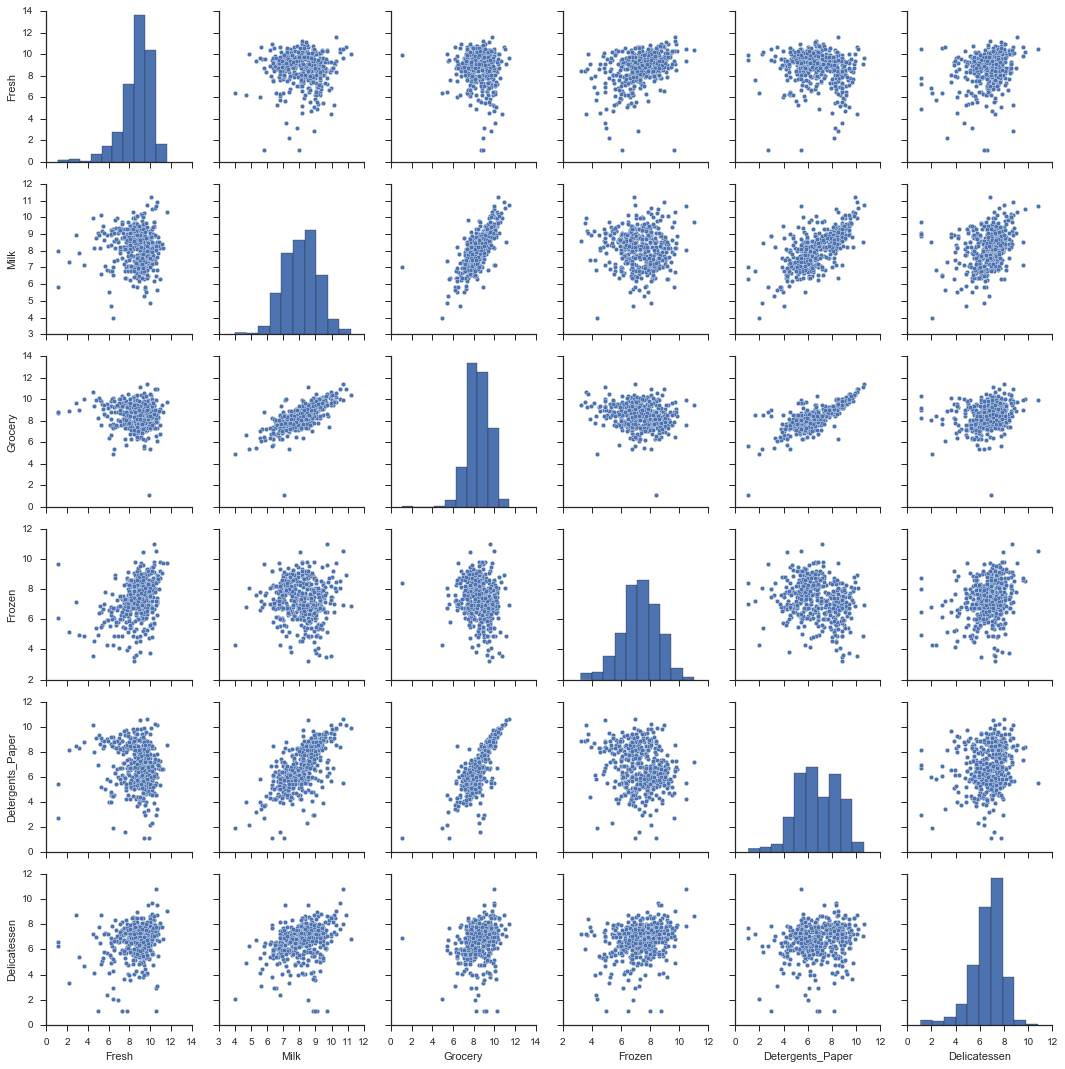

In [28]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data)
#pd.scatter_matrix(log_data, alpha = 0.6, figsize = (20,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [29]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.748305,7.161622,7.859799,7.064759,5.293305,5.786897
1,7.516433,8.760923,7.945910,7.104965,7.103322,5.686975
2,10.206625,8.827175,9.286375,7.218910,8.321422,7.668094


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [30]:
# For each feature find the data points with extreme high or low values
outliers  = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)

    # outliers indices
    outliers.extend(list(feature_outliers.index.values))
    
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers_indexes = list(set(outliers))
outlier_incexes_duplicated = list(set([x for x in outliers if outliers.count(x) > 1]))
print "Outliers: \n", outliers_indexes, "\n \nDuplicated Outliers: \n", outlier_incexes_duplicated

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outlier_incexes_duplicated]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: 
[128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183] 
 
Duplicated Outliers: 
[128, 65, 66, 75, 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are few datapoints considered outliers in the dataset. All outliers included in the following list --> [128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]

There are some datapoints considered outliers for more than one feature. Their indices within this list --> [65, 66, 75, 128, 154]

In theory we could test two paths here. 
- The first one is to get rid of all outliers. This approach will help us to generalize our results if we have really skewed datasets. The downside is we could drop some clusters of clients, especially huge companies or specialized companies (e.g. juice/milkshake cafes).
- The second option is to remove only duplicated ones. That does make sense since we're dropping very specific outliers which were potentially caused by accidental purchases or special cases.

In this exercise we'll remove only the duplicated outliers.  

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

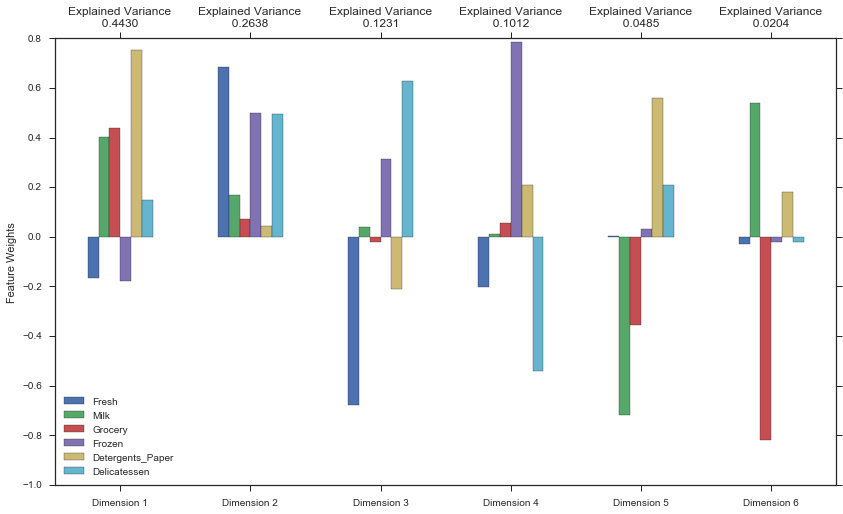

In [31]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
The sum of variances of the first two compoenents is 0.7071 or 70.71% (0.4433 + 0.2638).
The first four componenst explain 93.14% of the variance (0.4433 + 0.2638 + 0.1231 + 0.1012 = 0.9314).

Linear coefficients for each feature of the components are illustrated on the chart above. The high bars represent the features which add up a lot to the final component value. On the contrary the low bars indicate the features with no impact.

- 1st Principal Component: The "Detergents_Paper" feature gets highly positive weight. Milk and Grocery add up some weight as well. At the same time the 1st principal component shows negative weights for Fresh and Frozen.
- 2nd Principal Component: Significant positive weight is placed on Fresh and meaningful weight is placed on Frozen and Delicatessen.
- 3rd Principal Component: Frozen and Delicatessen get significant positive weight here, but Fresh gets significant negative value. 
- 4th Principal Component: Frozen gets massieve positive weight and some positive weight on Detergents_Paper while for Fresh and Delicatessen the indicators are negative.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [32]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.8692,-0.8591,-0.3482,-0.0696,-0.1302,-0.2804
1,0.3548,-1.3830,0.1156,0.6725,-0.3236,0.8801
2,1.7101,1.6559,-0.7070,-0.5312,0.2575,-0.0818


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [33]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [34]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.8692,-0.8591
1,0.3548,-1.3830
2,1.7101,1.6559


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-Means Clustering advantages:
- Computationally efficient and fast when K is small
- Implementation is easy

Gaussian Mixture Model
- Produces "soft" clustering, so a point could be assigned to two clusters with the estimated probability
- Fits more complex cluster shapes

Basically K-Means is a special case of Gaussian Mixture Model (GMM). While our dataset for this exercise is not that big we can try implementing more computationally intensieve GMM algorithm to get the "soft" classification boundary. The "soft" boundaries will help us identify the "core clients" in each cluster and will provide us with more flexibility to assign softly classified datapoints. In other words we could manually define rules for cluster assignment based on domain knowledge if necessary. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
    
def score_clustering(data, num_clusters):
    preds, _, _  = cluster(data, num_clusters)
    score = silhouette_score(data, preds)
    return score

def cluster(data, num_clusters):
    clusterer = GMM(n_components=num_clusters, covariance_type='full', random_state=42).fit(data)
    preds = clusterer.predict(data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds
    
for clusters in range(2,16):
    score = score_clustering(reduced_data, clusters)
    print("{} clusters - score: {}".format(clusters, score))

2 clusters - score: 0.41174985628
3 clusters - score: 0.398431881066
4 clusters - score: 0.289413783858
5 clusters - score: 0.191037489429
6 clusters - score: 0.296321087791
7 clusters - score: 0.310556696486
8 clusters - score: 0.206249919416
9 clusters - score: 0.178273547341
10 clusters - score: 0.184488673273
11 clusters - score: 0.15932320599
12 clusters - score: 0.127949888801
13 clusters - score: 0.112303539662
14 clusters - score: 0.134160709447
15 clusters - score: 0.107640956375


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
The higher Silhouette score indicates well seperated clusters. We've tried multiple clusters and the highest Silhouette score was calculated for 2 clusters (0.41). So we proceed with 2 clusters for our model. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

How many clusters you want to get: 2


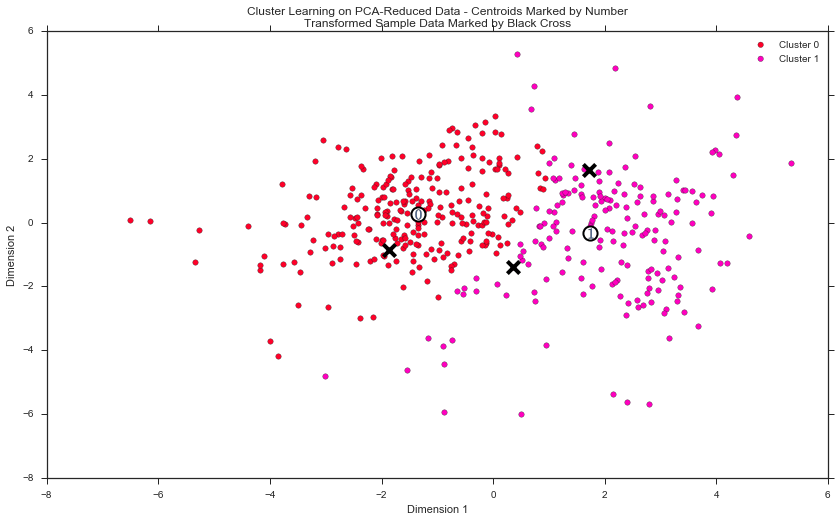

In [36]:
# Display the results of the clustering from implementation
num_clusters = input('How many clusters you want to get: ')
preds, centers, sample_preds = cluster(reduced_data, num_clusters)
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [37]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

display(data.describe(percentiles=[0.5]))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

- Segment 0: below 50% percentile spend for categories including Milk, Grocery, Detergetns_Paper and Delicatessen. The only above 50% percentile features are Fresh and Frozen. I assume we're dealing with small cafe or fast food restaurant here.

- Segment 1: My guess it's a small/medium convenience store which Milk, Grocery and Detergetns_Paper. For the mentioned categories we see higher volume of spend. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [38]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [52]:
display(true_centers)
display(np.sum(true_centers, axis=1))

display(samples)
display(np.sum(samples, axis=1))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


Segment 0    17627.0
Segment 1    25134.0
dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6300,1289,2591,1170,199,326
1,1838,6380,2824,1218,1216,295
2,27082,6817,10790,1365,4111,2139


0    11875
1    13771
2    52304
dtype: int64

**Answer:**

- Sample point 0 (Number 135): a small restaurant or a salad bar. Our predicted cluster is "Segment 0" which we called "small cafe/restaurant", so our initial guess and prediction are in line. The actual spend looks similar to the predicted one. 
- Sample point 1 (Number 235): a milkshake/juice or an ice-cream cafe. Our prediction "Segment 1" which was called "Retail". It could make sense or could not. I'm concerned about this datapoint, because at the first look it should be assigned to the segment 0. So we definitely need to investigate more. 
- Sample point 2 (Number 335): medium or large enterprise. Predicted "Segment 1" or "Retail". The prediction and initial guess are quite similar in this case. This example looks more or less correct. 



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

If we are counting the total amount of orders per week for each customer we'll be able to use the information to make a decision. In my view the proposed change will affect customers differently. For those who are relying on Fresh food the change could be quite dramatic. For others it could be not that significant. But we can't know for sure, there is a chance that our customers with high spends in Fresh category don't really need delivery happaning 5 days a week. 

We can use A/B testing to determine whether the change will affect our customer base. For A/B testing we need to randomly assign our customers to A and B groups. It make sense to choose A and B groups for each cluster\*, so there will be 4 samples in total. I would choose between customer satisfaction score (Net Promoter score), total order value and customer service tickets (complains) issued. 

Next step will be to test our assumption and if we'll spot a significant change (positive or negative) we could make the final decision. Our null hypothesis is "there will be no change between groups" and the alternative hypothesis is "the change exists (and it's statistically significant)".

<br>
\* Unfortunately we don't have any data on delivery, so the defined clusters could not be used for the tast, but nevertheless in theory we could use our results from this excercise.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We could use the trained model and predict cluster for the new customers or use cluster's label as a target varialbe. The second approach requires us to train another classification algorithm to predict the value for the new customers. The segment classification (or cluster) itself could be another feature used to help with making predictions in a supervised learning model.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

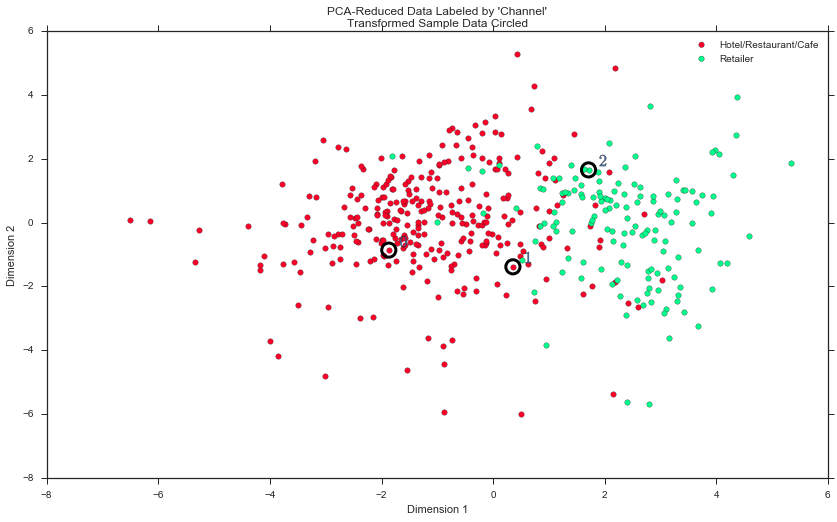

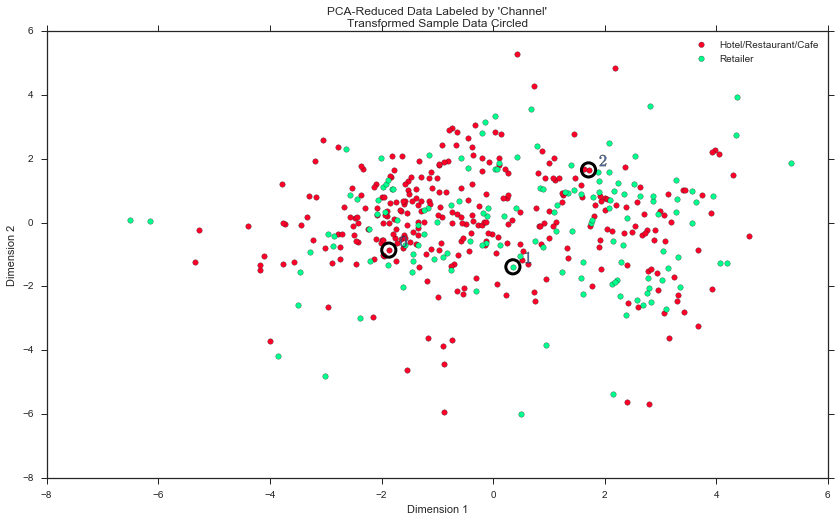

In [40]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outlier_incexes_duplicated, pca_samples[:5])

# Display the clustering results WITHOUT removing the outliers
rs.channel_results(reduced_data, [], pca_samples[:5])

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

It looks like the model performs well since it shows us customer segments which could be classified as "Retailers" on the right and "HoReCa" on the left-hand side side of the graph.Taking into account that we've used the GMM learning model we've got probability of beeing in the cluster for the point, not "hard" label.

<br>
I think the classification is quite decent, but could be improved. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.